In [32]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None,"display.max_columns", None)

In [33]:
hmdata = pd.read_csv('C:/Users/Study/OneDrive/Desktop/DU/Business_Intelligence/Home_assignment_BI/dataset_hm.csv')
hmdata.head(10) 
hmdata.shape
#hmdata_t = hmdata.drop("article_id","product_code","product_type_no","graphical_appearance_no","colour_group_code","perceived_colour_value_id","perceived_colour_master_id","perceived_colour_master_name","department_no","index_code",)
hmtrain = hmdata.sample(frac=0.1, random_state=100)
hmtrain.shape
hmtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8207 entries, 11352 to 37616
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   t_date                       8207 non-null   object 
 1   product_type_no              8207 non-null   int64  
 2   product_type_name            8207 non-null   object 
 3   product_group_name           8207 non-null   object 
 4   graphical_appearance_no      8207 non-null   int64  
 5   graphical_appearance_name    8207 non-null   object 
 6   colour_group_code            8207 non-null   int64  
 7   colour_group_name            8207 non-null   object 
 8   perceived_colour_value_id    8207 non-null   int64  
 9   perceived_colour_value_name  8207 non-null   object 
 10  index_group_no               8207 non-null   int64  
 11  index_group_name             8207 non-null   object 
 12  Price                        8207 non-null   float64
dtypes: float64(1)

In [34]:
# filter price positive
hmtrain = hmtrain[(hmtrain['Price']>0)]
hmtrain.shape
hmtrain[(hmtrain['Price']<0)].shape


(0, 13)

In [24]:
#extracting month from transaction date
hmtrain['t_date'] = pd.to_datetime(hmtrain['t_date'],infer_datetime_format=True)
hmtrain['t_date'].dt.strftime('%d/%m/%Y')
hmtrain['t_month'] = pd.to_datetime(hmtrain['t_date']).dt.month
hmtrain['t_month'].head(6)
hmtrain.head(6)


,t_date,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,index_group_no,index_group_name,Price,t_month
29925,2019-07-03,253,Vest top,Garment Upper body,1010016,Solid,12,Light Beige,1,Dusty Light,1,Ladieswear,0.016855,7
37142,2019-06-15,91,Sandals,Shoes,1010016,Solid,51,Light Pink,1,Dusty Light,4,Baby/Children,0.018793,6
39441,2019-10-27,275,Skirt,Garment Lower body,1010016,Solid,93,Dark Green,4,Dark,4,Baby/Children,0.036131,10
56812,2019-11-19,262,Jacket,Garment Upper body,1010016,Solid,73,Dark Blue,4,Dark,5,Mama,0.028847,11
23908,2019-02-12,265,Dress,Garment Full body,1010021,Lace,42,Red,5,Bright,1,Ladieswear,0.019856,2
52922,2019-07-22,264,Blazer,Garment Upper body,1010016,Solid,9,Black,4,Dark,1,Ladieswear,0.039521,7


In [36]:
#subsetting dataset for model because model needs numeric fields
hmpattern = hmtrain[["product_group_name","graphical_appearance_name","perceived_colour_value_name","index_group_name"]]
#get dummies to create categorical data
hmpattern = pd.get_dummies(hmpattern, columns=["product_group_name","graphical_appearance_name","perceived_colour_value_name","index_group_name"])
hmpattern.head(5)
hmpattern.shape


(7623, 50)

In [11]:
hmpattern.head(5)

,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_87,product_type_no_88,product_type_no_90,product_type_no_91,product_type_no_92,product_type_no_93,product_type_no_94,product_type_no_95,product_type_no_144,product_type_no_230,product_type_no_245,product_type_no_252,product_type_no_253,product_type_no_254,product_type_no_255,product_type_no_256,product_type_no_257,product_type_no_258,product_type_no_259,product_type_no_260,product_type_no_261,product_type_no_262,product_type_no_263,product_type_no_264,product_type_no_265,product_type_no_267,product_type_no_268,product_type_no_270,product_type_no_271,product_type_no_272,product_type_no_273,product_type_no_274,product_type_no_275,product_type_no_276,product_type_no_277,product_type_no_283,product_type_no_286,product_type_no_288,product_type_no_293,product_type_no_295,product_type_no_296,product_type_no_297,product_type_no_298,product_type_no_299,product_type_no_303,product_type_no_304,product_type_no_305,product_type_no_306,product_type_no_307,product_type_no_308,product_type_no_465,graphical_appearance_no_-1,graphical_appearance_no_1010001,graphical_appearance_no_1010002,graphical_appearance_no_1010004,graphical_appearance_no_1010005,graphical_appearance_no_1010006,graphical_appearance_no_1010007,graphical_appearance_no_1010008,graphical_appearance_no_1010009,graphical_appearance_no_1010010,graphical_appearance_no_1010011,graphical_appearance_no_1010012,graphical_appearance_no_1010013,graphical_appearance_no_1010014,graphical_appearance_no_1010015,graphical_appearance_no_1010016,graphical_appearance_no_1010017,graphical_appearance_no_1010018,graphical_appearance_no_1010019,graphical_appearance_no_1010020,graphical_appearance_no_1010021,graphical_appearance_no_1010022,graphical_appearance_no_1010023,graphical_appearance_no_1010024,graphical_appearance_no_1010025,graphical_appearance_no_1010026,graphical_appearance_no_1010027,graphical_appearance_no_1010028,colour_group_code_-1,colour_group_code_1,colour_group_code_3,colour_group_code_4,colour_group_code_5,colour_group_code_6,colour_group_code_7,colour_group_code_8,colour_group_code_9,colour_group_code_10,colour_group_code_11,colour_group_code_12,colour_group_code_13,colour_group_code_14,colour_group_code_15,colour_group_code_17,colour_group_code_19,colour_group_code_20,colour_group_code_21,colour_group_code_22,colour_group_code_23,colour_group_code_30,colour_group_code_31,colour_group_code_32,colour_group_code_33,colour_group_code_40,colour_group_code_41,colour_group_code_42,colour_group_code_43,colour_group_code_50,colour_group_code_51,colour_group_code_52,colour_group_code_53,colour_group_code_60,colour_group_code_61,colour_group_code_62,colour_group_code_63,colour_group_code_70,colour_group_code_71,colour_group_code_72,colour_group_code_73,colour_group_code_80,colour_group_code_81,colour_group_code_82,colour_group_code_83,colour_group_code_90,colour_group_code_91,colour_group_code_92,colour_group_code_93,perceived_colour_value_id_-1,perceived_colour_value_id_1,perceived_colour_value_id_2,perceived_colour_value_id_3,perceived_colour_value_id_4,perceived_colour_value_id_5,perceived_colour_value_id_6,perceived_colour_value_id_7,index_group_no_1,index_group_no_2,index_group_no_3,index_group_no_4,index_group_no_5,index_group_no_26
29925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
37142,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
39441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [37]:
!pip install sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
hmpattern_scale = pd.DataFrame(scale.fit_transform(hmpattern),columns= hmpattern.columns)
hmpattern_scale.head(4)


,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Swimwear,product_group_name_Underwear,graphical_appearance_name_All over pattern,graphical_appearance_name_Application/3D,graphical_appearance_name_Argyle,graphical_appearance_name_Chambray,graphical_appearance_name_Check,graphical_appearance_name_Colour blocking,graphical_appearance_name_Contrast,graphical_appearance_name_Denim,graphical_appearance_name_Dot,graphical_appearance_name_Embroidery,graphical_appearance_name_Front print,graphical_appearance_name_Glittering/Metallic,graphical_appearance_name_Jacquard,graphical_appearance_name_Lace,graphical_appearance_name_Melange,graphical_appearance_name_Mesh,graphical_appearance_name_Metallic,graphical_appearance_name_Mixed solid/pattern,graphical_appearance_name_Neps,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown,perceived_colour_value_name_Bright,perceived_colour_value_name_Dark,perceived_colour_value_name_Dusty Light,perceived_colour_value_name_Light,perceived_colour_value_name_Medium,perceived_colour_value_name_Medium Dusty,perceived_colour_value_name_Undefined,perceived_colour_value_name_Unknown,index_group_name_Baby/Children,index_group_name_Divided,index_group_name_Ladieswear,index_group_name_Mama,index_group_name_Menswear,index_group_name_Sport
0,2.404585,-0.562453,-1.036478,-0.056199,-0.224253,-0.142637,-0.154624,-0.423870,-0.114119,-0.011454,-0.068884,-0.155511,-0.139249,-0.052559,-0.238722,-0.067916,-0.105556,-0.191256,-0.092737,-0.091287,-0.114708,-0.258939,-0.036243,-0.034381,-0.064927,-0.0162,-0.032412,-0.11988,-0.175192,-0.101015,-0.044403,1.074243,-0.235016,-0.0162,-0.076194,-0.022913,-0.216065,1.164339,-0.506633,-0.409778,-0.236875,-0.383413,-0.036243,-0.0162,1.483325,-0.443089,-0.720087,-0.164144,-0.370017,-0.191256
1,-0.415872,1.777928,-1.036478,-0.056199,-0.224253,-0.142637,-0.154624,-0.423870,-0.114119,-0.011454,-0.068884,-0.155511,-0.139249,19.026298,-0.238722,-0.067916,-0.105556,-0.191256,-0.092737,-0.091287,-0.114708,-0.258939,-0.036243,-0.034381,-0.064927,-0.0162,-0.032412,-0.11988,-0.175192,-0.101015,-0.044403,-0.930888,-0.235016,-0.0162,-0.076194,-0.022913,-0.216065,1.164339,-0.506633,-0.409778,-0.236875,-0.383413,-0.036243,-0.0162,1.483325,-0.443089,-0.720087,-0.164144,-0.370017,-0.191256
2,-0.415872,1.777928,-1.036478,-0.056199,-0.224253,-0.142637,-0.154624,2.359214,-0.114119,-0.011454,-0.068884,-0.155511,-0.139249,-0.052559,-0.238722,-0.067916,-0.105556,-0.191256,-0.092737,-0.091287,-0.114708,-0.258939,-0.036243,-0.034381,-0.064927,-0.0162,-0.032412,-0.11988,-0.175192,-0.101015,-0.044403,-0.930888,-0.235016,-0.0162,-0.076194,-0.022913,-0.216065,-0.858856,1.973817,-0.409778,-0.236875,-0.383413,-0.036243,-0.0162,1.483325,-0.443089,-0.720087,-0.164144,-0.370017,-0.191256
3,-0.415872,-0.562453,0.964806,-0.056199,-0.224253,-0.142637,-0.154624,-0.423870,-0.114119,-0.011454,-0.068884,-0.155511,-0.139249,-0.052559,-0.238722,-0.067916,-0.105556,-0.191256,-0.092737,-0.091287,-0.114708,-0.258939,-0.036243,-0.034381,-0.064927,-0.0162,-0.032412,-0.11988,-0.175192,-0.101015,-0.044403,1.074243,-0.235016,-0.0162,-0.076194,-0.022913,-0.216065,-0.858856,-0.506633,2.440347,-0.236875,-0.383413,-0.036243,-0.0162,1.483325,-0.443089,-0.720087,-0.164144,-0.370017,-0.191256


In [38]:
pca_obj = PCA()
hmpattern_pca = pd.DataFrame(pca_obj.fit_transform(hmpattern_scale))
hmpattern_pca.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.682335,0.649599,-0.595791,-0.252529,1.874372,0.919127,0.232602,-0.575646,0.656552,0.069839,0.525930,-0.592269,-0.575683,0.104036,0.010224,-0.257549,0.253419,-0.057224,0.163766,-0.221997,-0.121922,-0.196446,0.159102,-0.038446,0.047119,0.125792,-0.083291,0.057816,0.028999,-0.208209,-0.076373,0.180847,-0.420004,0.118407,-0.159418,0.040431,0.345572,-0.956011,-0.722247,0.138525,0.465343,-0.698522,1.294661,0.835584,1.191994,-0.030600,1.187969e-12,-1.696248e-15,4.288050e-15,4.465554e-15
1,0.506866,1.558445,0.899231,-0.107183,0.672715,-0.206080,-2.304869,-0.003491,-1.907597,3.392317,-1.012394,0.041792,1.447831,1.661920,2.212266,-0.246595,5.259821,3.764311,-2.530840,4.441923,-0.557105,0.510772,4.362637,4.197939,-12.197294,0.308871,4.198615,0.416975,-1.860628,-2.272108,0.757127,-2.942935,0.069961,2.227337,-2.104562,0.808044,0.582287,-0.573126,0.156638,2.567185,0.404965,2.066998,4.738517,-1.933834,-0.325639,0.007166,7.979410e-13,-3.727990e-14,-2.439631e-14,9.524687e-16
2,-1.145728,2.808448,-0.825532,-0.045070,0.106520,0.055768,-0.769706,-1.290806,0.291016,-0.096271,-1.132409,0.383133,0.725508,-1.061247,0.090898,-0.344814,-0.093195,0.696516,-0.058723,0.277398,0.114597,0.096269,0.006537,0.052093,-0.013309,-0.099229,-0.030756,-0.028861,0.113477,0.240280,-0.316921,0.135224,0.337434,-0.361266,-0.161139,-0.073839,-0.284433,0.534578,0.176075,-0.267369,-1.074687,-0.716216,0.166425,-0.363738,-0.819378,0.017050,7.227811e-13,6.681614e-14,2.273540e-14,-7.966957e-15
3,-1.292658,-0.927451,-0.317480,0.037443,-0.321953,1.926316,0.592047,0.686990,-0.389812,-0.189420,-1.087902,-0.762796,-0.121116,-0.425023,-0.140172,-0.136562,-0.259084,-0.020432,-0.050777,-0.269312,-0.084056,-0.136590,0.036195,-0.069024,-0.014056,-0.086224,0.070452,-0.001646,0.019836,0.177134,0.153545,-0.388128,0.167053,0.168003,0.321276,-0.552071,-0.356902,-0.106787,0.097465,-0.322047,-0.357299,0.160880,1.406656,0.333690,0.869224,-0.023534,-7.307878e-15,-5.232174e-15,-2.613068e-14,1.170086e-14


In [28]:
explained_sum = 0
for i in range(len(pca_obj.explained_variance_ratio_)):
    current = pca_obj.explained_variance_ratio_[i]
    explained_sum += current
    print("Components: ", i + 1, "Explained ratio: ", explained_sum)

Components:  1 Explained ratio:  0.04195726418924504
Components:  2 Explained ratio:  0.08027881568295092
Components:  3 Explained ratio:  0.11698641020509695
Components:  4 Explained ratio:  0.15121158117647066
Components:  5 Explained ratio:  0.18237154157647129
Components:  6 Explained ratio:  0.21128258564845676
Components:  7 Explained ratio:  0.23928902541626157
Components:  8 Explained ratio:  0.26675627603808744
Components:  9 Explained ratio:  0.2928464079181357
Components:  10 Explained ratio:  0.31818070616324606
Components:  11 Explained ratio:  0.34253785258032954
Components:  12 Explained ratio:  0.3656248343901113
Components:  13 Explained ratio:  0.38855857450582043
Components:  14 Explained ratio:  0.4113510972133048
Components:  15 Explained ratio:  0.4332023144459134
Components:  16 Explained ratio:  0.4549390408376195
Components:  17 Explained ratio:  0.4761967721439027
Components:  18 Explained ratio:  0.4971183629777071
Components:  19 Explained ratio:  0.51795449

In [29]:
!pip install yellowbrick
 

c:\users\study\onedrive\desktop\du\business_intelligence\labs\venv\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\study\onedrive\desktop\du\business_intelligence\labs\venv\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


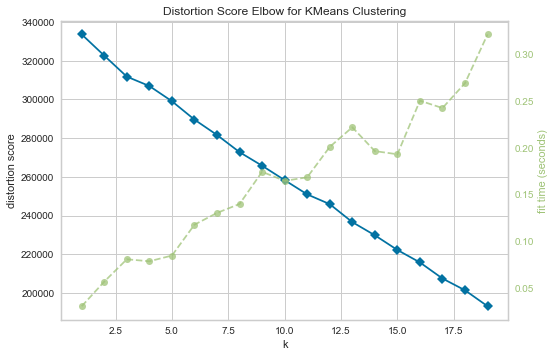

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
hmpattern_pca_best = hmpattern_pca.iloc[:,1:40]

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(hmpattern_pca_best)        # Fit the data to the visualizer
visualizer.show()  